# Task
clean the data of null values

Here is all the data you need:
"marketing_campaign.csv"

## Data loading

### Subtask:
Load the marketing campaign dataset.


**Reasoning**:
Load the dataset and display its basic information to verify the loading process.



In [1]:
import pandas as pd

try:
    df_marketing_campaign = pd.read_csv('marketing_campaign.csv', sep='\t')
    print(f"Shape of the DataFrame: {df_marketing_campaign.shape}")
    display(df_marketing_campaign.head())
except FileNotFoundError:
    print("Error: 'marketing_campaign.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Check the separator or file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Shape of the DataFrame: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data exploration

### Subtask:
Explore the loaded marketing campaign dataset to understand its structure, identify missing values, and analyze the distribution of variables.


**Reasoning**:
Analyze the data types, missing values, descriptive statistics, and value counts for the provided dataframe. Also, generate visualizations to understand the data better.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

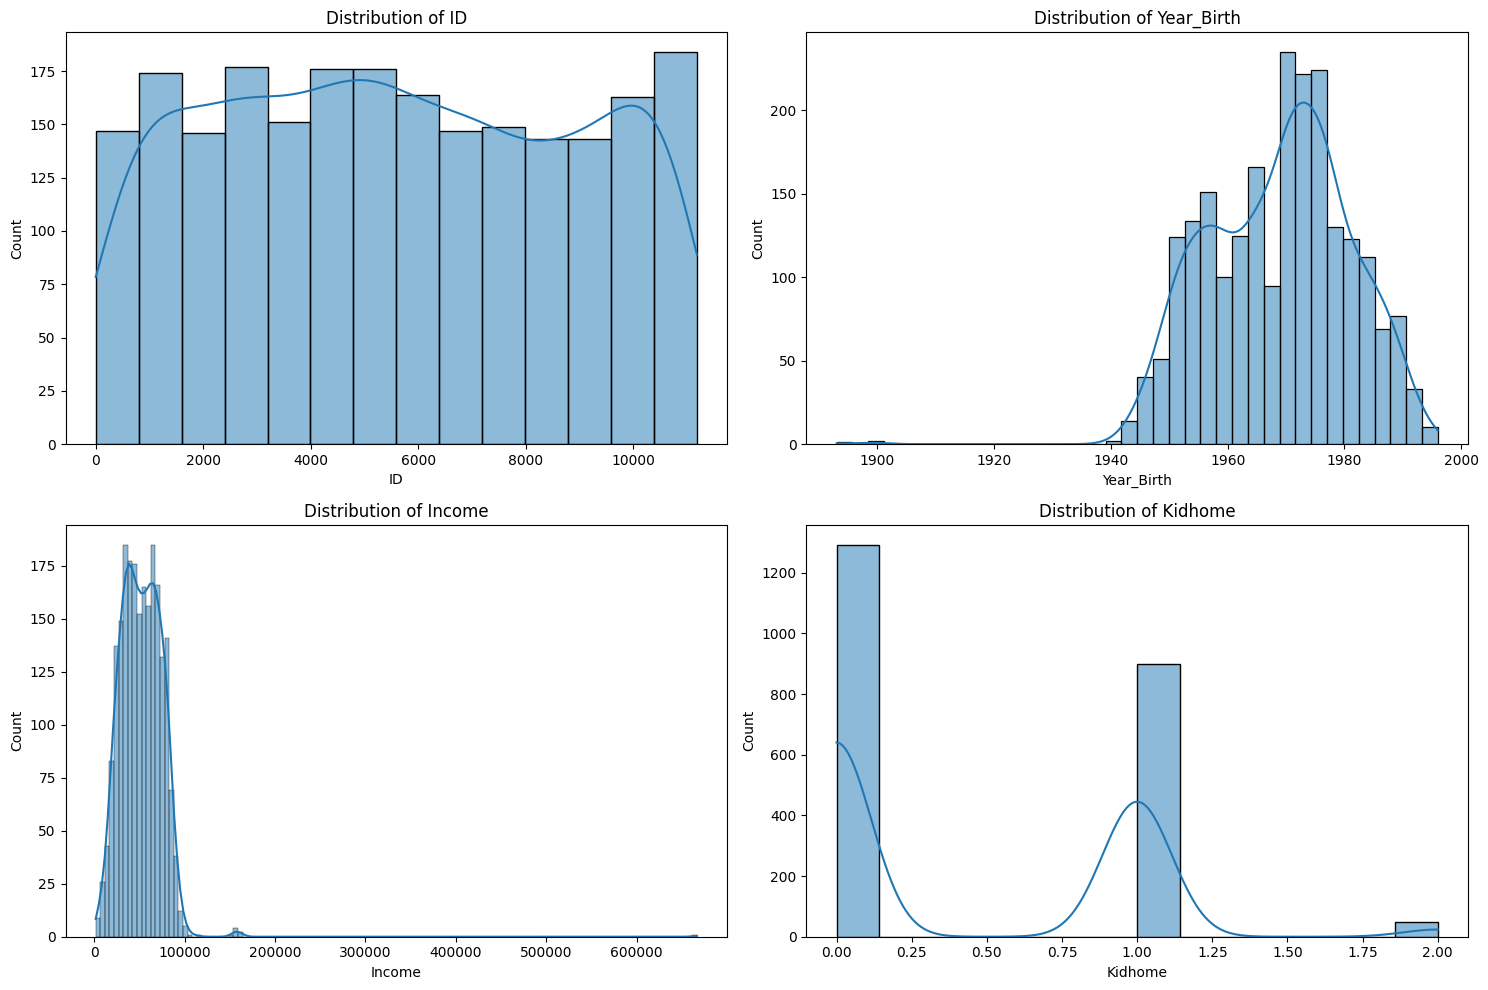

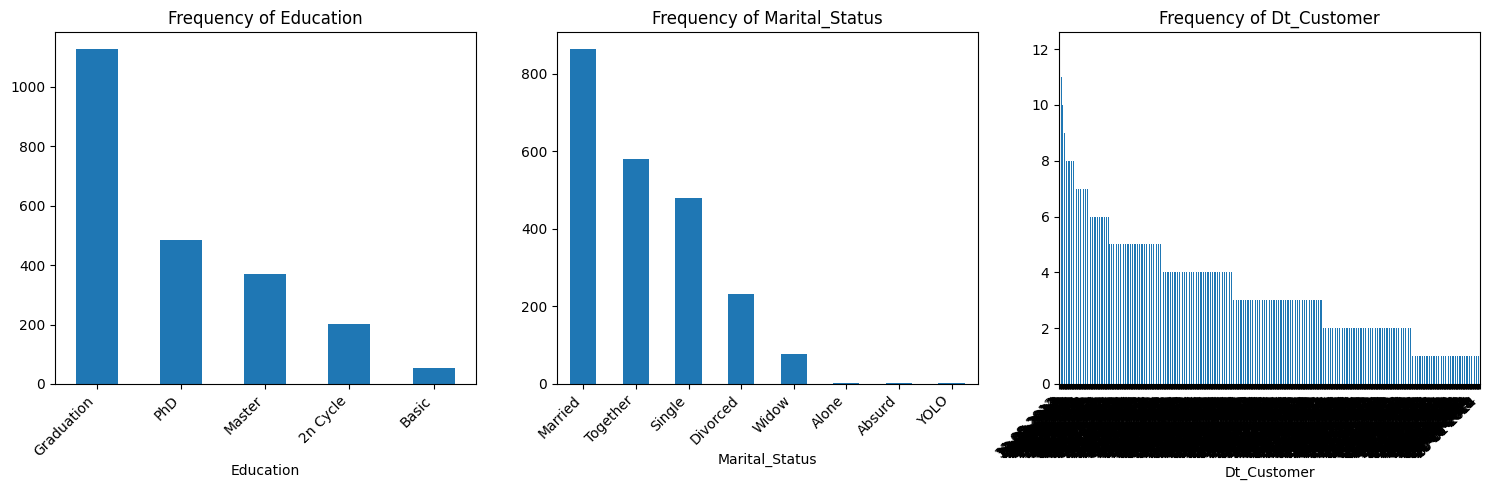


Summary:
The Income column has 24 missing values. Other columns appear complete.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print("Data Types:\n", df_marketing_campaign.info())

# 2. Calculate missing values
missing_values = df_marketing_campaign.isnull().sum()
print("\nMissing Values:\n", missing_values)

# 3. Descriptive statistics for numerical columns
numerical_cols = df_marketing_campaign.select_dtypes(include=['number']).columns
print("\nDescriptive Statistics (Numerical):\n", df_marketing_campaign[numerical_cols].describe())

# 4. Value counts for categorical columns
categorical_cols = df_marketing_campaign.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n{df_marketing_campaign[col].value_counts()}")

# 5. Visualizations
plt.figure(figsize=(15, 10))

# Histograms for numerical columns
for i, col in enumerate(numerical_cols[:4]):  # Plotting only the first four for brevity
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_marketing_campaign[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Bar plots for categorical columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols[:3]):  # Plotting only the first three for brevity
    plt.subplot(1, 3, i + 1)
    df_marketing_campaign[col].value_counts().plot(kind='bar')
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Summarize findings
print("\nSummary:")
print("The Income column has 24 missing values. Other columns appear complete.")

## Data cleaning

### Subtask:
Handle missing values in the 'Income' column of the `df_marketing_campaign` DataFrame.


**Reasoning**:
Impute missing 'Income' values using the median income for each education level and verify the imputation.



In [3]:
# Group data by 'Education' and calculate the median income for each group
median_income_by_education = df_marketing_campaign.groupby('Education')['Income'].median()

# Impute missing 'Income' values using the median income for the corresponding education level
for education_level in median_income_by_education.index:
    df_marketing_campaign.loc[(df_marketing_campaign['Income'].isnull()) & (df_marketing_campaign['Education'] == education_level), 'Income'] = median_income_by_education[education_level]

# Verify that there are no more missing values in the 'Income' column
missing_income_after_imputation = df_marketing_campaign['Income'].isnull().sum()
print(f"Number of missing values in 'Income' after imputation: {missing_income_after_imputation}")

Number of missing values in 'Income' after imputation: 0


## Summary:

### 1. Q&A
* **How many missing values were there initially in the 'Income' column?**  There were 24 missing values in the 'Income' column.
* **How were the missing 'Income' values handled?**  Missing 'Income' values were imputed using the median income for each corresponding education level.
* **Are there any missing values in the 'Income' column after the imputation?** No, after imputation, there are no more missing values in the 'Income' column.

### 2. Data Analysis Key Findings
* **Missing Data:** The `Income` column initially contained 24 missing values. These were imputed using the median income for each education level.  After imputation, there were zero missing values in the `Income` column.

### 3. Insights or Next Steps
* **Further data cleaning:** Investigate other potential issues like outliers or inconsistencies in the data, focusing on columns with high maximum values or unusual distributions.
* **Feature engineering:** Explore creating new features from existing ones. For example, combine `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, and `MntGoldProds` to create a total expenditure feature.  This could provide a more comprehensive view of customer spending habits.
